# Import necessary libraries

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from datetime import datetime as dt
import seaborn as sns
import os

# Read Dataset

In [2]:
folderpath = r"C:\Users\chenh\z_Careerfoundry\A2_DataVisal\Data\Processed data"

In [3]:
df=pd.read_csv(os.path.join(folderpath, 'NewYorkbike.csv'))

D:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (6,8) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
df.drop(columns = {'Unnamed: 0','_merge'}, inplace = True)

In [5]:
df.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'date', 'avgTemp'],
      dtype='object')

# Pick one theme

In [6]:
sns.set_theme(style="darkgrid", palette="Blues")

# Create a bar chart of the top 20 starting stations frequencies

In [7]:
df['value'] = 1

In [8]:
df_t = df.groupby('start_station_name')['value'].count().reset_index()

In [9]:
df_t

,start_station_name,value
0,1 Ave & E 110 St,21526
1,1 Ave & E 16 St,67349
2,1 Ave & E 18 St,70854
3,1 Ave & E 30 St,45412
4,1 Ave & E 39 St,52373
...,...,...
1756,Wyckoff Ave & Gates Ave,16556
1757,Wyckoff St & 3 Ave,250
1758,Wyckoff St & Nevins St,11527
1759,Wythe Ave & Metropolitan Ave,66468


In [10]:
top20 = df_t.nlargest(20, 'value')

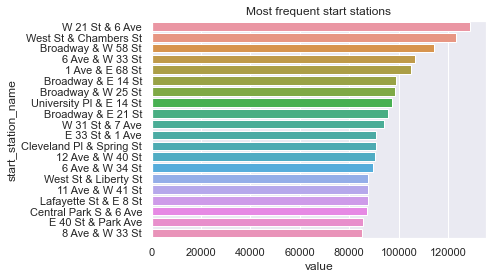

In [11]:
sns.barplot(data = top20, x = 'value', y = 'start_station_name')
plt.title("Most frequent start stations")
plt.show()

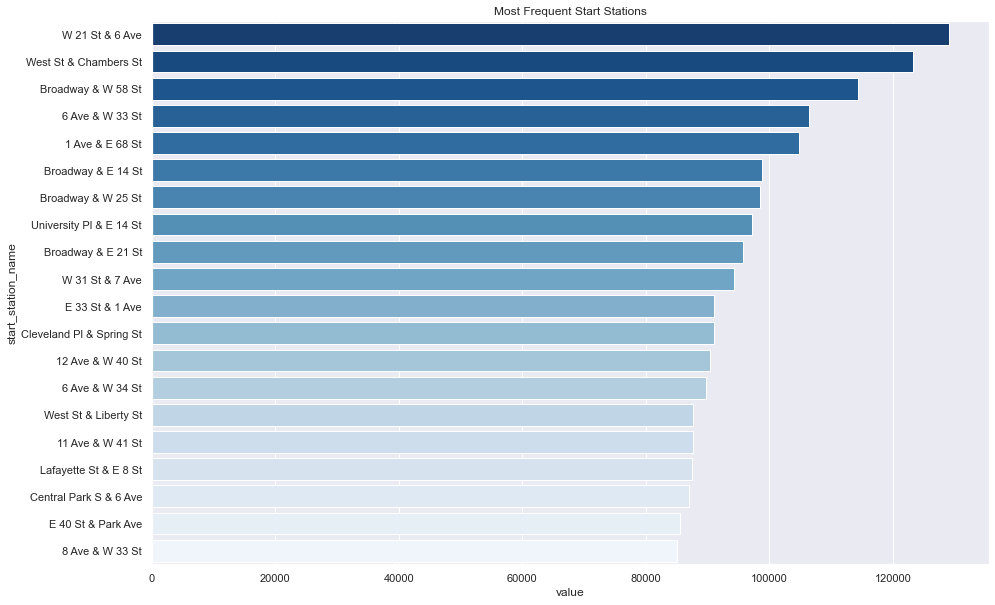

In [12]:
plt.figure(figsize = (15, 10))
with sns.color_palette("Blues_r", n_colors=20) as colors:
    # 绘制柱状图，并将颜色渐变应用到图表
    sns.barplot(data=top20, x='value', y='start_station_name', palette=colors)
    plt.title("Most Frequent Start Stations")
    plt.show()

# Recreate the dual-axis line plot

In [13]:
df['date'] = pd.to_datetime(df['date'])

In [14]:
df_group = pd.DataFrame(df.groupby(['date'])['ride_id'].count()).reset_index()

In [15]:
df_group.rename(columns = {'ride_id':'bike_rides_daily'}, inplace = True)
df = df.merge(df_group, on = "date", how = 'outer', indicator = True)

In [16]:
df_temp = df.set_index('date')

In [17]:
df_temp.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,avgTemp,value,bike_rides_daily,_merge
date,,,,,,,,,,,,,,,,,
2022-01-01,88237B34DAFDB069,electric_bike,2022-01-01 00:00:13,2022-01-01 00:30:28,Broadway & W 160 St,8157.06,Broadway & W 160 St,8157.06,40.835775,-73.943400,40.835775,-73.943400,casual,11.6,1,20428,both
2022-01-01,4545E384F601A7E9,classic_bike,2022-01-01 00:00:32,2022-01-01 00:02:15,Forsyth St & Broome St,5453.05,Forsyth St & Broome St,5453.05,40.718939,-73.992663,40.718939,-73.992663,member,11.6,1,20428,both
2022-01-01,7CE9B56332A37463,electric_bike,2022-01-01 00:00:42,2022-01-01 00:11:38,Myrtle Ave & Marcy Ave,4707.03,Willoughby St & Fleet St,4628.05,40.695398,-73.949549,40.691966,-73.981302,member,11.6,1,20428,both
2022-01-01,4012D0DCF0DECD64,classic_bike,2022-01-01 00:00:44,2022-01-02 01:00:38,W 43 St & 10 Ave,6756.01,NaN,NaN,40.760094,-73.994618,NaN,NaN,casual,11.6,1,20428,both
2022-01-01,AEAF2FFEBB00845B,electric_bike,2022-01-01 00:00:50,2022-01-01 02:39:37,W 15 St & 7 Ave,6030.06,W 33 St & 7 Ave,6407.07,40.739355,-73.999318,40.750200,-73.990931,casual,11.6,1,20428,both


In [18]:
sample_df_temp = df_temp.sample(n=3000, random_state=1)

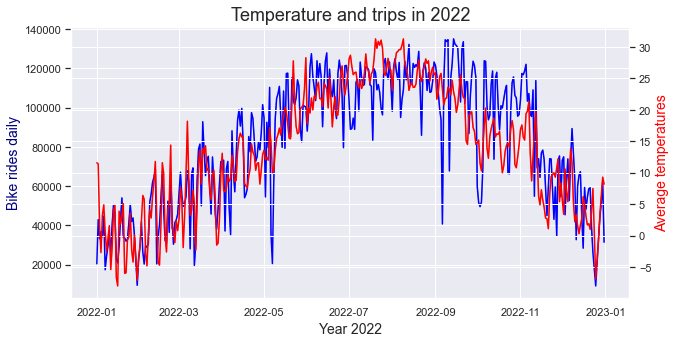

In [19]:
fig,ax = plt.subplots(figsize=(10, 5))
sns.lineplot(data = sample_df_temp['bike_rides_daily'], color = "b")
ax.set_xlabel("Year 2022", fontsize = 14) # set x-axis label
ax.set_ylabel("Bike rides daily",color = "navy", fontsize = 14) # set y-axis label

ax2 = ax.twinx()
sns.lineplot(data = sample_df_temp['avgTemp'], color="r", ax=ax2)
ax2.set_ylabel("Average temperatures", color = "red",fontsize=14)
plt.title('Temperature and trips in 2022', fontsize = 18)
plt.show()

# box plot

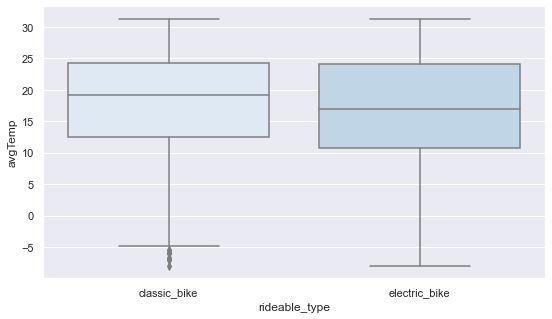

In [20]:
plt.figure(figsize=(9,5))
sns.boxplot(x = 'rideable_type', y = 'avgTemp', data = sample_df_temp)
plt.show()

The distribution of rental amount of classic bike and electric bike are similer under different temperatures.

The distribution of rentals for classic bike is more concentrated, mostly within the temperature range of 25-13 degrees, while the distribution for electric bike is slightly more dispersed, focusing between 25-10 degrees. Additionally, the mean temoeratyres of rental for classic is higher.

The lower temperature limit for rentals of classic is higher, while the lower temperature limit for rentals of electric is lower.

# FacetGrid

In [21]:
sample_df_temp['started_at'] = pd.to_datetime(sample_df_temp['started_at'])

In [22]:
sample_df_temp['hour'] = sample_df_temp['started_at'].dt.hour

In [26]:
sample_df_temp = sample_df_temp.reset_index(drop=True)

In [27]:
sample_df_temp.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,avgTemp,value,bike_rides_daily,_merge,hour
0,B13E582CBFA235EA,classic_bike,2022-09-04 12:10:04,2022-09-04 12:14:14,East End Ave & E 86 St,7113.08,E 85 St & York Ave,7146.04,40.775186,-73.944461,40.775369,-73.948034,member,25.3,1,99471,both,12
1,21F26C446F6E3A13,classic_bike,2022-04-11 14:37:27,2022-04-11 14:41:11,E 6 St & 2 Ave,5669.12,Ave A & E 14 St,5779.11,40.727379,-73.988408,40.730311,-73.980472,member,8.8,1,75355,both,14
2,0B75FF7FDE1ABCC3,classic_bike,2022-12-20 08:42:03,2022-12-20 09:11:15,E 40 St & Park Ave,6432.11,Jay St & Tech Pl,4710.06,40.750756,-73.978326,40.695065,-73.987167,member,1.9,1,58639,both,8
3,07A0F4C97C8A0242,classic_bike,2022-11-17 18:04:56,2022-11-17 18:38:24,Jay St & Tech Pl,4710.06,Marcus Garvey Blvd & Macon St,4278.03,40.695065,-73.987167,40.682601,-73.938037,member,5.7,1,78388,both,18
4,73B48ACA7BC76796,classic_bike,2022-04-07 07:12:11,2022-04-07 07:32:30,W 39 St & 9 Ave,6644.04,1 Ave & E 68 St,6822.09,40.756458,-73.993722,40.765005,-73.958185,member,9.1,1,35322,both,7


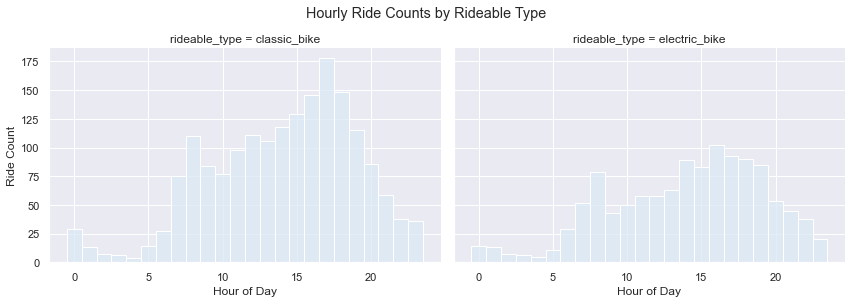

In [28]:
g = sns.FacetGrid(sample_df_temp, col="rideable_type", height=4, aspect=1.5)
g.map_dataframe(sns.histplot, x="hour", bins=24, discrete=True)
g.set_axis_labels("Hour of Day", "Ride Count")
plt.suptitle("Hourly Ride Counts by Rideable Type", y=1.05)
plt.show()

The rental distribution trends for types classic and electric are generally similar across different hours of the day, with type classic having a higher rental count.

The first peak in rental counts for both types appears around 8 a.m., with the highest count for type classic occurring at 5 p.m., while the highest for type electric appears at 4 p.m.